# TAREA FINAL

# 1. Definición del Caso de Negocio

**Reto clave del sector hotelero:**

<p align="justify">
En el sector hotelero, hacer un manejo eficiente de las reservas es vital para maximizar la ocupación y controlar costes. Uno de los desafíos más notables es la incertidumbre generada por los cambios frecuentes en las reservas, como ajustes en las fechas de estancia, tipo de habitación o solicitudes especiales. Estas variaciones pueden influir significativamente en la disponibilidad de habitaciones y la asignación de recursos, además de afectar la experiencia del cliente. Por lo tanto, es crucial para los hoteles encontrar formas eficaces de gestionar y prever estos cambios para mantener su eficiencia y satisfacción del cliente en un mercado competitivo.
</p>

**Nuestra propuesta de valor:**

<p align="justify">
Con el fin de cubrir el reto antes mencionado, vamos a desarrollar un modelo de aprendizaje automático que nos sirva para predecir el número de cambios que los clientes realizarán en sus reservas de esta cadena hotelera. Gracias a esto el hotel puede asignar habitaciones y recursos de una manera más estratégica, reduciendo los desafíos y costes que implican los ajustes de última hora.
</p>

<p align="justify">
Al tener una visión más clara de los posibles cambios, el hotel está en mejor posición para gestionar sus habitaciones, lo que potencialmente puede llevar a una mayor ocupación y, por tanto, a un incremento en los ingresos.
</p>

<p align="justify">
Un aspecto muy relevante de este enfoque es la mejora en la experiencia del cliente: Al estar un paso por delante en la comprensión de sus necesidades y preferencias, el hotel puede prepararse de manera más adecuada para ofrecer un servicio que no solo cumpla, sino que supere las expectativas de los huéspedes. Esto, sin duda, tiene un impacto positivo en su satisfacción y lealtad.
</p>

<p align="justify">
En resumen, este enfoque de análisis predictivo no solo mejora la operativa interna del hotel, sino que también fortalece su posición en un mercado altamente competitivo. La capacidad de adaptarse proactivamente a las necesidades cambiantes de los clientes es un factor distintivo en la industria hotelera, y este modelo es una herramienta clave para lograrlo.
</p>

<p align="justify">
Para cuantificar el número de modificaciones de un cliente realizaremos la suma de las variables 'total_of_special_requests' y 'booking_changes'provenientes del dataset 'hotel_bookings.csv', que representan el número de peticiones del cliente y cambios en las reservas respectivamente.
</p>

data['total_modifications'] = data['total_of_special_requests'] + data['booking_changes']

# 2. Ingesta de Dataset
El primer paso de nuestro trabajo será realizar la ingesta del dataset hotel_bookings, este conjunto de datos almacena una serie de variables sobre reservas hoteleras.
Mediante la librería Pandas cargaremos toda esta información en una estructura dataframe.


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/hotel_bookings.csv'
data = pd.read_csv(file_path)

# 3. Análisis Preliminar
El análisis exploratorio de datos tiene como objetivo obtener un mayor conocimiento sobre el dataset con el que se va a trabajar, con este propósito estudiaremos los siguientes puntos:

* Dimensiones
* Variables
* Tipos
* Estadísticas
* Valores nulos
* Outliers
* Valores únicos
* Matriz de correlación



**Dimensiones:**

En primer lugar observaremos las dimensiones y el tamaño del conjunto de datos al que nos enfrentamos.
En este caso se trata de un dataset con 32 variables y 119390 casos de estudio, lo cual da como resultado un total de 3820480 datos.  
Además veremos una muestra de las 5 primeras filas del conjunto de datos.

In [ ]:
print("\n1. Shape:")
print(data.shape)

print("\n2. Size:")
print(data.size)

print("\n3. Structure:")
print(data.head())


1. Shape:
(119390, 32)

2. Size:
3820480

3. Structure:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0  

**Variables:**

El siguiente paso será explicar el significado de cada una de las variables que integran el dataset, en el caso de columnas categóricas detallaremos a que se refieren cada uno de sus posibles valores.

* adr : tarifa media diaria.

* adults : número de adultos.

* agent : ID de la agencia de viajes que realizó la reserva.

* arrival_date_day_of_month : día del mes de la fecha de llegada.

* arrival_date_month : mes de la fecha de llegada con 12 categorías: "de "enero" a "diciembre".

* arrival_date_week_number : número de semana de la fecha de llegada.

* arrival_date_year : año de la fecha de llegada.

* assigned_room_type : código del tipo de habitación asignado a la reserva. A veces, el tipo de habitación asignado difiere del tipo de habitación reservado por motivos de funcionamiento del hotel (por ejemplo, exceso de reservas) o a petición del cliente. El código se presenta en lugar de la designación por razones de anonimato.

* babies : número de bebés.

* booking_changes : número de cambios/enmiendas realizados en la reserva desde el momento en que se introdujo la reserva en el PMS hasta el momento de la facturación o cancelación.

* children : número de niños.

* company : ID de la empresa/entidad que realizó la reserva o responsable del pago de la reserva. La identificación se presenta en lugar de la designación por razones de anonimato.

* country : país de origen. Las categorías se representan en el formato ISO 3155-3:2013

* customer_type : Tipo de reserva, asumiendo una de las cuatro categorías:

  * Contract - cuando la reserva tiene asociada una adjudicación u otro tipo de contrato.
  * Group – cuando la reserva está asociada a un grupo.
  * Transient – cuando la reserva no forma parte de un grupo o contrato, y no está asociada a otra reserva transitoria;
  * Transient-party – cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria

* days_in_waiting_list : número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente

* deposit_type : indicación de si el cliente hizo un depósito para garantizar la reserva. Esta variable puede asumir tres categorías:

  * No Deposit – no se hizo ningún depósito.
  * Non Refund – se realizó un depósito por valor del coste total de la estancia.
  * Refundable – se realizó un depósito por un valor inferior al coste total de la estancia.

* distribution_channel : canal de distribución de reservas. El término "AT" significa "agencias de viajes" y "TO" significa "operadores de tours".

* hotel: tipo de hotel reservado:

  * City Hotel - hotel en la ciudad
  * Resort Hotel - hotel de tipo resort

* is_canceled : valor que indica si la reserva fue cancelada (1) o no (0).

* is_repeated_guests : valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0).

* lead_time : número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada.

* market_segment : Designación del segmento de mercado. En las categorías, el término "AT" significa "agencias de viajes" y "TO" significa "operadores de tours".

* meal : tipo de comida reservada. Las categorías se presentan en paquetes de comidas de hospitalidad estándar:

  * Undefined/SC – ningún paquete de comidas
  * BB – cama & desayuno
  * HB – media pensión (desayuno y otra comida, normalmente la cena)
  * FB – pensión completa (desayuno, almuerzo y cena)

* previous_bookings_not_canceled : número de reservas anteriores no canceladas por el cliente antes de la reserva actual.

* previous_cancellations : número de reservas anteriores canceladas por el cliente antes de la reserva actual.

* required_car_parking_spaces : número de plazas de aparcamiento que necesita el cliente.

* reservation_status : estado de la última reserva, asumiendo una de las tres categorías:

  * Canceled – el cliente ha cancelado la reserva
  * Check-Out – el cliente se ha registrado pero ya se ha marchado
  * No-Show – el cliente no facturó e informó al hotel del motivo

* reservation_status_date : fecha en la que se estableció el último estado. Esta variable se puede utilizar junto con ReservationStatus para saber cuándo se canceló la reserva o cuándo abandonó el cliente el hotel.

* reserved_room_type : código del tipo de habitación reservada. El código se presenta en lugar de la designación por razones de anonimato.

* stays_in_weekend_nights : número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel.

* stays_in_week_nights : número de noches de la semana (de lunes a viernes) que el huésped se alojó o reservó para alojarse en el hotel.

* total_of_special_requests : número de peticiones especiales realizadas por el cliente (por ejemplo cama doble).

In [ ]:
print("\n4. Columns:")
print(data.columns)


4. Columns:
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


**Tipos:**

Una vez exlicadas las distintas variables veremos el tipo de datos que contienen. En este caso podemos encontrar tanto columnas numéricas de tipo int64 y float64, así como columnas categóricas de tipo object.

In [ ]:
print("5. Data Types:")
print(data.dtypes)

5. Data Types:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent              

**Estadísticas:**

En este punto observaremos una serie de estadísticas generales para cada una de las variables, en concreto estudiaremos las siguientes características:

* count: número de valores no nulos
* mean: media de los valores
* std: desviación estándar
* min: valor mínimo
* 25%: percentil 25
* 50%: percentil 50
* 75%: percentil 75
* max: valor máximo

In [ ]:
print("\n6. Summary Statistics for Numerical Columns:")
print(data.describe())


6. Summary Statistics for Numerical Columns:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000 

**Nulos:**

A continuación se indicará el número de valores nulos que presenta cada variable.
La mayoría de variables no presentan valores nulos, sin embargo existen tres en los que sí aparecen:

* country: 0.4% de valores nulos, se trata de un porcentaje ínfimo, por lo que no tiene especial importancia.
* country: 13.7% de valores nulos, es importante la estrategia de imputación de valores nulos que se seguirá.
* company: 94.3% de valores nulos, tiene sentido que tenga un porcentaje tan alto debido a que la mayoría de reservas las pagan particulares en lugar de empresas. Es necesario decidir si se eliminará esta columna en el caso de que no aporten mucha información los valores no nulos o si se ideará un nuevo valor para representar a los valores nulos.


In [ ]:
print("\n7. Checking for Missing Values:")
print(data.isnull().sum())


7. Checking for Missing Values:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                   

**Outliers**

Los outliers son valores extremos de una variable numérica del dataset, normalmente se encuentran alejados del percentil 25 y del percentil 75, por tanto al visualizar las columnas medianta gráficas boxplot podremos encontrarlos en los extremos de la imagen.

Para advertir la presencia de outliers se generará una gráfica boxplot de cada variable númerica. A la vista de todas las gráficas, podemos observar que únicamente lead_time presenta valores que podríamos considerar outliers, por ser varios órdenes de magnitud mayores que el límite superior del boxplot.


8. Number of numeric columns: 20

9. Numeric columns: Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

10. Boxplot visualization


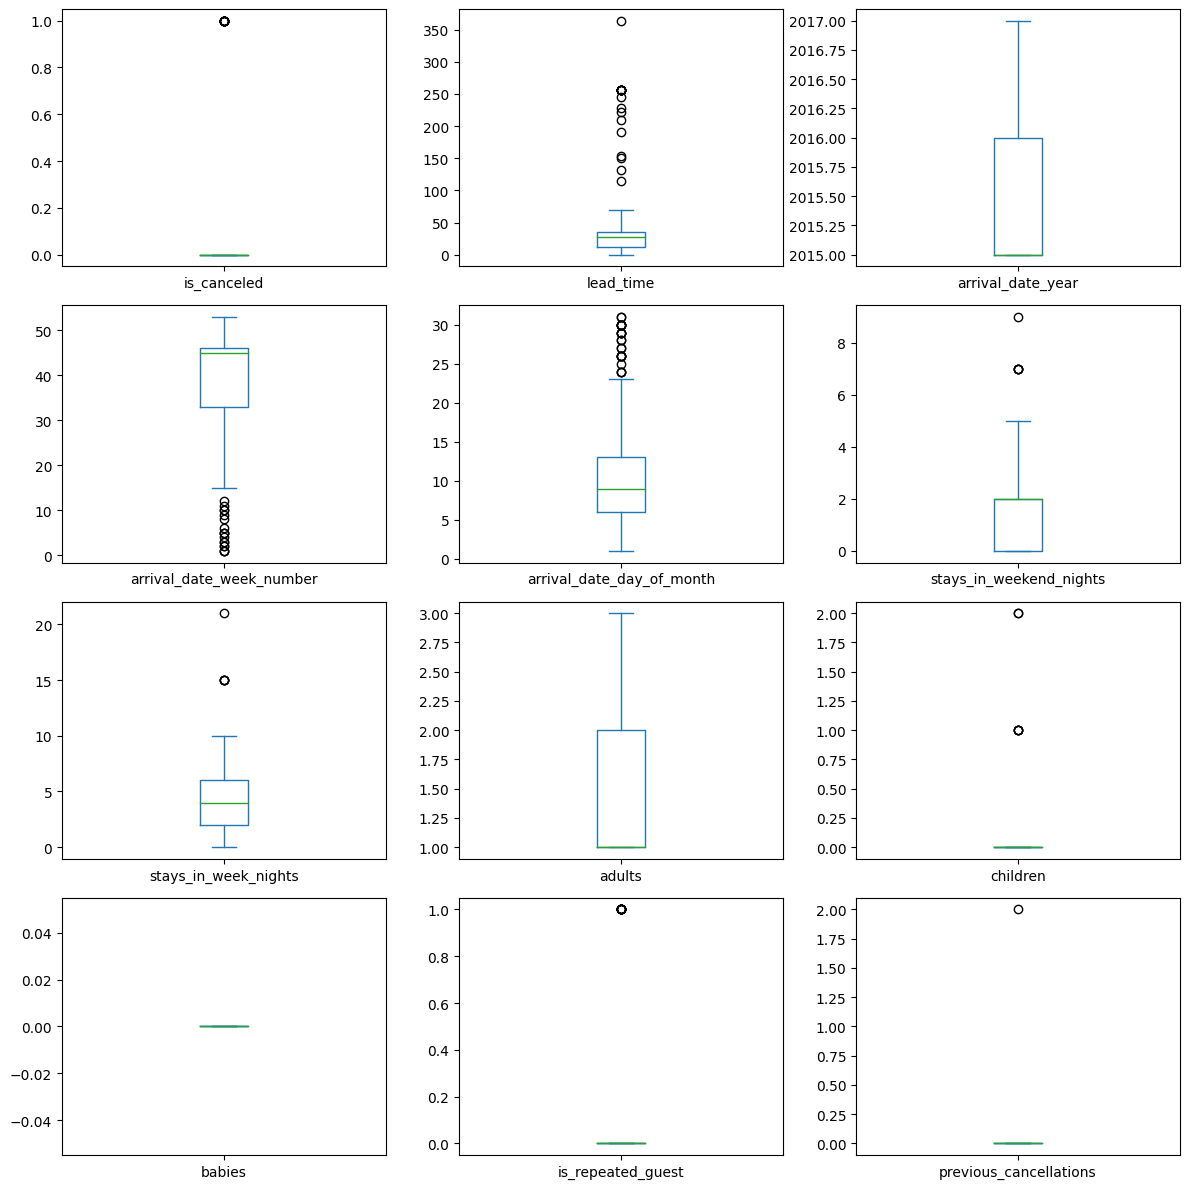

In [ ]:
import matplotlib.pyplot as plt

data_numeric_cols = data.select_dtypes(['int64', 'float64']).dropna()

print("\n8. Number of numeric columns:", len(data_numeric_cols.columns))

print("\n9. Numeric columns:", data_numeric_cols.columns)

print("\n10. Boxplot visualization")
fig, axs = plt.subplots(4, 3, figsize=(12, 12))
variables = data_numeric_cols.columns
variable_index = 0
for i in range(4):
    for j in range(3):
        variable = variables[variable_index]
        data_numeric_cols[variable].plot(kind='box', ax=axs[i, j])
        variable_index = (variable_index + 1) % len(variables)
plt.tight_layout()
plt.show()

**Únicos**

Los valores únicos son todos los posibles valores distintos que aparecen en una variable. En el caso de las numéricas, debido a la cantidad de posibles valores que suelen tener, excepto si son variables binarias, no resulta tan interesante como en el de las categóricas, que nos permite observar las distintas categorías de la columna.
En este punto se apreciará en primer lugar el número de valores distintos que presenta cada columna y en segundo lugar el número de apariciones de cada valor.

Cabe destacar como en variables como children o babies, el valor 0 tiene un porcentaje de aparición muchísimo mayor que el resto, significando por tanto que la mayoría de reservas son solo para adultos.

In [ ]:
print("\n11. List of Unique Values:")
print(data.nunique())

print("\n12. Count of Unique Values:")
for col in data.columns:
    print(f"\nColumna: {col}")
    print(data[col].value_counts())


11. List of Unique Values:
hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            3

**Matriz de correlación**

La matriz de correlación nos permite observar el grado de relación que se da entre las distintas variables, es decir, como de influyente resulta el valor de una para otra. Mediante la tabla generada, podremos ver qué variables pueden resultar más importantes a la hora de predecir otras.

Aunque en general la mayoría de variables no tienen mucha relación entre sí, podemos encontrar algunos pares de variables con indicios de relación, a continuación exploraremos todos aquellos que han obtenido una puntuación superior a 0.3:

* arrival_date_year y arrival_date_week_number: dependiendo de las características del año la gente suela salir más determinadas semanas, por ejemplo dependiendo de las fechas de festivos y puentes en el año.
* stays_in_weekend_nights y stays_in_week_nights: dependiendo del número de días en semana que se aloje un cliente se quedará más o menos días en fin de semana y viceversa, por ejemplo si un cliente llega un jueves al alojamiento es probable que pase el fin de semana completo también.
* is_repeated_guest y previous_bookings_not_canceled: si un cliente ha repetido hotel suele ser síntoma de que ha disfrutado de su estancia y por tanto no habrá cancelado muchas reservas en el mismo.
* agent y company: las empresas suelen confiar la gestión de sus viajes a los mismos agentes y viceversa.
* children y adr: normalmente a mayor número de niños los adultos pueden gastar una cantidad de dinero menor en sus alojamientos.


13. Correlation Matrix:


<ipython-input-9-e75e43b0e179>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


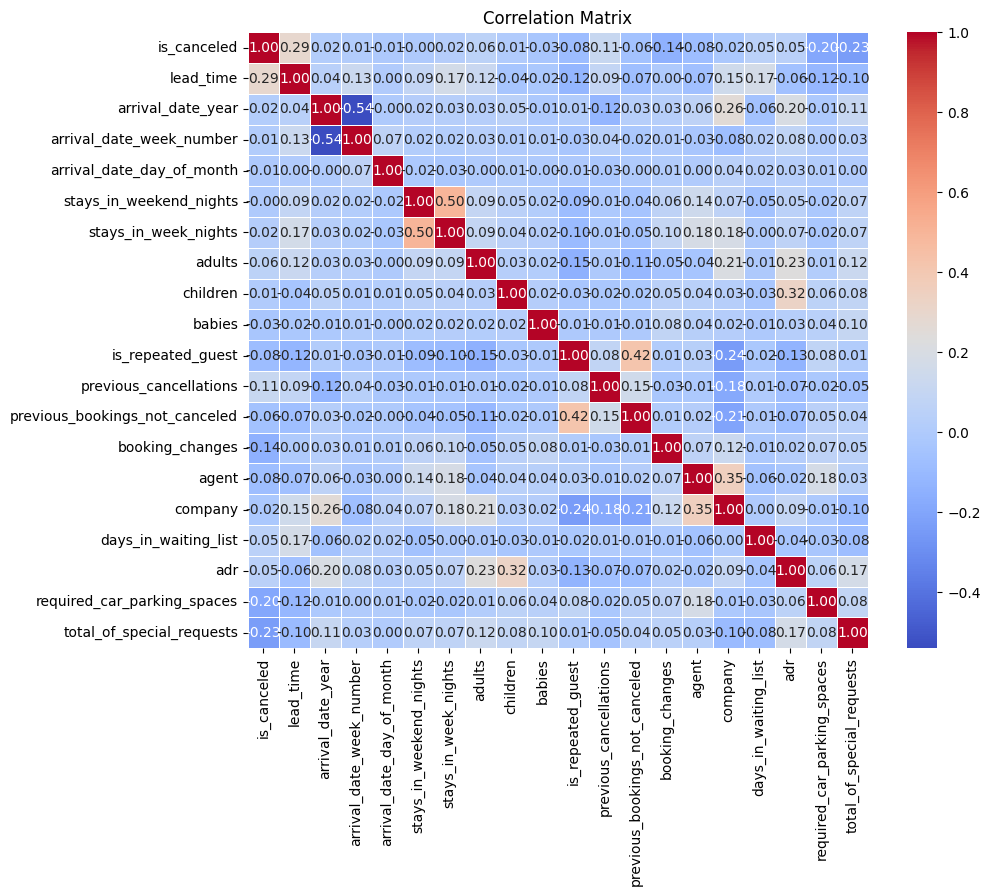

In [ ]:
import seaborn as sns

print("\n13. Correlation Matrix:")
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 4. Preparación del Dataset

### Preprocesamiento y Limpieza

**Valores faltantes**

En el análisis preliminar, se identificaron valores faltantes en las columnas 'country', 'agent', 'company' y 'children'. En esta sección, se evaluará el porcentaje de valores faltantes en cada columna para decidir si tratar estos valores o eliminar directamente la columna.

In [ ]:
nan_company_percentage = data['company'].isnull().mean() * 100
print(f"Porcentaje de valores faltantes en 'company': {nan_company_percentage:.2f}%")
data.drop('company', axis=1, inplace=True)

Porcentaje de valores faltantes en 'company': 94.31%


Dado que el porcentaje de valores faltantes en la columna 'company' es del 94.31%, se decide eliminar toda la columna del DataFrame.

In [ ]:
nan_agent_percentage = data['agent'].isnull().mean() * 100
print(f"Porcentaje de valores faltantes en 'agent': {nan_agent_percentage:.2f}%")
data.dropna(subset=['agent'], inplace=True)

Porcentaje de valores faltantes en 'agent': 13.69%


El porcentaje de valores faltantes en la columna 'agent' es del 13.69%, por lo tanto, se decide eliminar solo las filas que contienen valores faltantes.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
nan_country_percentage = data['country'].isnull().mean() * 100
print(f"Porcentaje de valores faltantes en 'country': {nan_country_percentage:.2f}%")
imputer = SimpleImputer(strategy='most_frequent')
data['country'] = imputer.fit_transform(data[['country']])

Porcentaje de valores faltantes en 'country': 0.15%


El porcentaje de valores faltantes en 'country' era muy pequeño (0.15%), por lo tanto, se decidió imputar los valores faltantes con los valores más frecuentes utilizando el SimpleImputer de sklearn.

In [ ]:
nan_children_percentage = data['children'].isnull().mean() * 100
print(f"Porcentaje de valores faltantes en 'children': {nan_children_percentage:.4f}%")

median_value = data['children'].median()
print(f"Valor de la mediana para 'children': {median_value}")

imputer = SimpleImputer(strategy='median')
data['children'] = imputer.fit_transform(data[['children']])

Porcentaje de valores faltantes en 'children': 0.0019%
Valor de la mediana para 'children': 0.0


La columna 'children' tiene un número muy bajo de valores faltantes. Por esta razón, se ha decidido proceder imputando los valores faltantes utilizando el SimpleImputer de sklearn, con la mediana de los valores, la cual ha sido calculada y resulta ser 0.

In [ ]:
print(data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**Outliers**

A través del algoritmo Isolation Forest de scikit-learn, se identifican los outliers en el DataFrame. El modelo se entrena para predecir los outliers en las columnas numéricas, dando como resultado un array de valores donde -1 indica un outlier y 1 indica un número normal. La nueva columna 'outlier' se agrega al DataFrame original y luego se visualiza el DataFrame con la nueva columna.

In [ ]:
from sklearn.ensemble import IsolationForest

numeric_cols = data.select_dtypes(include=['number'])
model = IsolationForest(contamination=0.1)

model.fit(numeric_cols)
outliers = model.predict(numeric_cols)

data['outlier'] = outliers
print(data.head())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
3                        27                          1   
4                        27                          1   
5                        27                          1   
7                        27                          1   
8                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
3                        0                     1       1  ...    No Deposit   
4     

In [ ]:
print(data['outlier'].value_counts())

 1    92745
-1    10305
Name: outlier, dtype: int64


Se filtra el DataFrame para incluir solo los 'no outliers'



In [ ]:
df_no_outliers = data[data['outlier'] == 1]

print(df_no_outliers)

               hotel  is_canceled  lead_time  arrival_date_year  \
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
7       Resort Hotel            0          9               2015   
8       Resort Hotel            1         85               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
3                    July                        27   
4                    July                        27   
5                    July     

Se compara la cantidad de outliers presentes en los dos conjuntos de datos y se puede observar que todos los valores atípicos han sido eliminados.

In [ ]:
count_outliers_original = (data['outlier'] == -1).sum()
print(f"Número de outliers en el DataFrame original: {count_outliers_original}")

count_outliers_removed = (df_no_outliers['outlier'] == -1).sum()
print(f"Número de outliers en el DataFrame sin outliers: {count_outliers_removed}")

Número de outliers en el DataFrame original: 10305
Número de outliers en el DataFrame sin outliers: 0


Vamos a eliminar la columna 'outlier' de ambos dataframes y luego estableceremos que el dataframe original sea el que no tiene outliers:

In [ ]:
data = data.drop(columns=['outlier'])

df_no_outliers = df_no_outliers.drop(columns=['outlier'])

print("DataFrame original sin la columna 'outlier':")
print(data.head())

print("\nDataFrame sin outliers sin la columna 'outlier':")
print(df_no_outliers.head())

data = df_no_outliers.copy()

print("DataFrame original sin outliers:")
print(data.head())


DataFrame original sin la columna 'outlier':
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
3                        27                          1   
4                        27                          1   
5                        27                          1   
7                        27                          1   
8                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
3                        0                     1      

**Data leakage**

Se van a eliminar las columnas que causan data leakage (days_in_waiting_list, is_canceled, reservation_status_date), ya que contienen información que no está disponible en el momento de la reserva.

In [ ]:
data = data.drop(columns=['days_in_waiting_list', 'is_canceled', 'reservation_status_date'])

Es importante señalar que las columnas 'total_of_special_requests' y 'booking_changes' también son un ejemplo de data leakage, ya que contienen información no disponible en el momento de la reserva. Sin embargo, no las eliminamos, ya que las utilizamos para construir la variable objetivo 'total_modifications'.

**Codificación de las variables**

Se realizará la codificación de las variables de la siguiente manera:
- Para las variables numéricas, se escalarán mediante el StandardScaler de scikit-learn.
- En cuanto a las variables categóricas, se codificarán utilizando el OneHotEncoder de scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def transformColumns(data):

  numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
  categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

  print("Columnas Numéricas:")
  print(numerical_cols)

  print("\nColumnas Categóricas:")
  print(categorical_cols)

  preprocessor = ColumnTransformer(
      transformers=[
          ('num', StandardScaler(), numerical_cols),
          ('cat', OneHotEncoder(), categorical_cols)
      ])

  pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

  data_transformed = pipeline.fit_transform(data)

  print("\nDataframe transformed:")
  print(data_transformed)

  return data_transformed

# 5. Selección y Construcción de Características (Feature Engineering)
La característica más importante que debemos construir se trata de la variable objetivo total_modifications, la cual proviene de la suma de las variables total_of_special_requests y booking_changes, por tanto representa el número total de cambios y peticiones que realiza un cliente.

Mediante este valor podemos evaluar el grado de exigencia y trabajo que conllevará su estancia. Además mostraremos una muestra de la nueva variable, así como sus principales características.



In [ ]:
data['total_modifications'] = data['total_of_special_requests'] + data['booking_changes']

print('Muestra de total_modifications')
print(data['total_modifications'])

print('\nEstadísticas de total_modifications')
print(data['total_modifications'].describe())

Muestra de total_modifications
3         0
4         1
5         1
7         1
8         1
         ..
119385    0
119386    2
119387    4
119388    0
119389    2
Name: total_modifications, Length: 92745, dtype: int64

Estadísticas de total_modifications
count    92745.000000
mean         0.724233
std          0.921724
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         17.000000
Name: total_modifications, dtype: float64


Una vez creada la variable objetivo, debemos eliminar las dos columnas utilizadas para su construcción y separar la variable objetivo del conjunto de predictores.

In [ ]:
data = data.drop(['total_of_special_requests', 'booking_changes'], axis=1)

y = data['total_modifications']

x = data.drop(['total_modifications'], axis=1)

A continuación realizaremos una reducción de la dimensionalidad con el objetivo de facilitar el rendimiento de nuestro modelo.

Para ello utilizaremos el algoritmo TruncatedSVD para reducir la dimensionalidad debido a que tras la codificación de las variables categóricas el conjunto de datos se convierte en una matriz dispersa.

In [ ]:
from sklearn.decomposition import TruncatedSVD

x_transformed = transformColumns(x)

tSVD_selected_components = TruncatedSVD(n_components=20)

reduced_data = tSVD_selected_components.fit_transform(x_transformed)

pca_x = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])

print("\nDataframe reduced:")
print(pca_x.head())


Columnas Numéricas:
Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'agent', 'adr',
       'required_car_parking_spaces'],
      dtype='object')

Columnas Categóricas:
Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

Dataframe transformed:
  (0, 0)	-0.9214040756176005
  (0, 1)	-1.67558164752258
  (0, 2)	-0.011805707734748427
  (0, 3)	-1.7030676269048022
  (0, 4)	-1.0170997459990614
  (0, 5)	-0.9228052683685017
  (0, 6)	-1.907880963332932
  (0, 7)	-0.22013662284526817
  (0, 8)	-0.040550887465902415
  (0, 9)	-0.019705629002570627
  (0, 10)	-0.17287782922450648
  (0, 

# 6. Construcción y Validación del Modelo

###Elección de Modelo

Regresión Lineal:

Nos hemos decidido por el algoritmo de regresión lineal debido a su eficacia para crear relaciones lineales entre variables numéricas. Esta elección se basa en la claridad y sencillez del algoritmo, lo que facilita una comprensión detallada de las relaciones lineales entre variables. Además, su eficiencia computacional es una ventaja significativa frente a otros algoritmos.

<p align="justify">
Regresión de Ridge:

La Regresión de Ridge se suele utilizar para datasets numéricos que tienen los datos muy dispersos. Aunque en este caso, encaja mejor la regresión Lineal, hemos querido dejar el resultado que nos ha dado este algoritmo para demostrar que los datos con los que estamos trabajando no están dispersos y así dar valor al resultado de regresión lineal. Esto se puede observar al comprobar que ambos algoritmos de regresión presentan un resultado prácticamente idéntico.
</p>

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge

linear_regression_model = LinearRegression()
ridge_regression_model = Ridge()

###Validación Cruzada

<p align="justify">
Nos hemos decantado por la validación cruzada con K-Fold como método de evaluación debido a su eficacia en mejorar la precisión y fiabilidad de nuestro modelo de regresión lineal. K-Fold maximiza el uso de nuestros datos al dividirlos en varios subconjuntos, permitiendo que cada parte sea utilizada tanto para entrenamiento como para validación. Esto asegura que el modelo sea probado exhaustivamente, reduciendo el riesgo de sesgos y mejorando su capacidad de generalización a nuevos datos. La técnica de K-Fold es particularmente valiosa en contextos donde los datos son limitados y se busca una evaluación robusta y representativa del rendimiento del modelo.
</p>

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

####Regresión Lineal:

In [ ]:
model = LinearRegression()
mse_scores = cross_val_score(model, pca_x, y, cv=kf, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-mse_scores)

print(f'RMSE scores para Regresión Lineal: {rmse_scores}')
print(f'Promedio de RMSE: {rmse_scores.mean()}')

RMSE scores para Regresión Lineal: [0.8234068  0.83128    0.83085595 0.83116366 0.81797337]
Promedio de RMSE: 0.8269359562497606


####Regresión de Ridge:

In [ ]:
ridge_mse_scores = cross_val_score(ridge_regression_model, pca_x, y, cv=kf, scoring='neg_mean_squared_error')
ridge_rmse_scores = np.sqrt(-ridge_mse_scores)

print(f'RMSE scores para Regresión de Ridge: {ridge_rmse_scores}')
print(f'Promedio de RMSE para Regresión de Ridge: {ridge_rmse_scores.mean()}')

RMSE scores para Regresión de Ridge: [0.82340691 0.83127984 0.830856   0.83116369 0.81797319]
Promedio de RMSE para Regresión de Ridge: 0.8269359251866826


####RMSE (Root Mean Squared Error):

<p align="justify">
Hemos escogido el RMSE como medida de scoring debido a que es particularmente útil porque penaliza más los errores grandes, lo que es crucial en muchos contextos prácticos donde los errores grandes son más perjudiciales que los pequeños. Esta métrica nos proporciona una visión clara y cuantificable del rendimiento del modelo, permitiéndonos identificar áreas donde el modelo podría no estar prediciendo con precisión. En conjunto, tanto la regresión lineal como el MSE forman un enfoque robusto y práctico para nuestro análisis colaborativo.
</p>

####Divisiones en el Análisis de Componentes Principales:

<p align="justify">
A la hora de realizar el Análisis de Componentes Principales, hemos probado
a dividir nuestros datos en grupos de 10, 15 y 20 columnas. Tanto en Regresión Lineal como en Regresión de Ridge, hemos obtenido mejores resultados con 20 columnas, y aunque es importante destacar que la diferencia es muy leve, vamos a continuar con este número de divisiones.
</p>

####Resultados del modelo:

<p align="justify">
En nuestro caso de estudio de regresión lineal, un resultado de RMSE (Root Mean Square Error) de 0.82 representa un resultado notablemente bueno, especialmente considerando el rango de nuestra variable objetivo que varía de 0 a 21. El RMSE es una medida del error de predicción del modelo, que nos proporciona una estimación de la magnitud del error en las mismas unidades que la variable objetivo. Un RMSE de 0.82 indica que, en promedio, las predicciones de nuestro modelo difieren del valor real por menos de una unidad en este rango. Dada la amplitud del rango de nuestra variable objetivo este nivel de precisión es significativamente alto, sugiriendo que el modelo es capaz de realizar predicciones muy cercanas a los valores reales.
</p>

<p align="justify">
Es importante contextualizar el valor de RMSE en relación con el rango específico de la variable objetivo. En un rango que se extiende de 0 a 21, un error promedio de menos de una unidad es proporcionalmente pequeño. Esto implica que nuestro modelo tiene una alta precisión predictiva y es confiable para aplicaciones prácticas. Tal nivel de error es especialmente relevante en situaciones donde incluso pequeñas variaciones en la predicción pueden tener implicaciones significativas. Por lo tanto, en el contexto de nuestro análisis, un RMSE de 0.82 no solo es bueno, sino que también nos prueba una alta eficacia del algoritmo de regresión lineal a la hora de capturar y predecir correctamente las tendencias en los datos.
</p>

# 7. Implementación

Colocar un modelo de Machine Learning en producción implica emplear el modelo para realizar predicciones o tomar decisiones en un entorno laboral, más allá de su aplicación en un entorno de prueba.

Este proceso requiere haber entrenado y validado el modelo de manera adecuada, asegurándose de que sea lo suficientemente preciso y confiable para su implementación en un entorno productivo. Además, implica evaluar cómo se integrará el modelo en el flujo de trabajo y cómo se facilitará el acceso a él. Por ejemplo, podría ser expuesto como una interfaz de programación de aplicaciones (API) que otras aplicaciones puedan invocar, o se puede incorporar directamente en una aplicación ya existente. Asimismo, es crucial considerar la monitorización y el mantenimiento continuo del modelo una vez que esté en producción.

En resumen, llevar a cabo la implementación de un modelo de ML en producción significa emplearlo para resolver problemas o tomar decisiones en un entorno laboral real, asegurándose de su correcta integración y respaldo en el flujo de trabajo preexistente.

Para implementar el modelo de aprendizaje automático en un entorno de producción, deben seguirse algunos pasos clave. En este ejemplo específico, se utiliza AWS (Amazon Web Services) como plataforma en la nube:
1. **Entrenamiento del Modelo:**

   Utilizar servicios de AWS como Amazon SageMaker para entrenar el modelo, subiendo los datos de entrenamiento a Amazon S3 y configurando el entorno de SageMaker para el proceso de entrenamiento.

2. **Despliegue del Modelo en AWS:**
   
   Empaquetar el modelo en un contenedor Docker y cargarlo en Amazon ECR. Desplegar el modelo utilizando Amazon SageMaker para crear un endpoint expuesto a través de una API RESTful.

3. **Creación de una API:**
   
   Utilizar Amazon API Gateway para construir una API RESTful que actúe como interfaz para el modelo SageMaker, configurando los recursos de la API para aceptar información de reserva como entrada.

4. **Gestión de Solicitudes y Respuestas:**
   
   Configurar una función AWS Lambda que se active al realizar una llamada a la API. Esta función puede encargarse del preprocesamiento de datos, llamar al endpoint de SageMaker y manejar la respuesta.

5. **Integración con el Sistema del Hotel:**
   
   Integrar la API de predicción de cambios con el sistema de reservas del hotel, realizando llamadas API al endpoint configurado con API Gateway.

6. **Monitoreo y Mantenimiento:**
   
   Utilizar Amazon CloudWatch para monitorear el rendimiento del modelo, los tiempos de respuesta y detectar posibles errores. Activar la monitorización en tiempo real del modelo de Amazon SageMaker para detectar desviaciones en el rendimiento.

7. **Seguridad y Conformidad:**
   
   Configurar autorizaciones IAM para garantizar que solo los servicios y personas autorizadas tengan acceso a los recursos. En caso necesario, utilizar Amazon VPC para aislar recursos y mejorar la seguridad.

8. **Actualizaciones y Retraining:**
   
   Establecer una pipeline de reentrenamiento para actualizar periódicamente el modelo con nuevos datos, pudiendo automatizar este proceso con AWS Step Functions o AWS DataPipeline.